# RCall graphics

_Simon Byrne_

_16th April, 2015_

These are some short notes on using R graphics through Julia using RCall

In [1]:
using RCall

## Writing to a file

The standard R method, via opening a device, plotting, and closing it, works as it does in R.

In [2]:
reval("pdf('/tmp/aa.pdf')"); # opens new device
reval("plot(1:10)"); # create plot
reval("dev.off()"); # close device (writes to file)
isfile("/tmp/aa.pdf")

true

If doing this from within IJulia (see below), you should create and close the device within the one cell.

## IJulia

From within the IJulia notebook interface, standard R plotting routines can be called directly, and the resulting graphics output (if any) will be displayed after evaluation, but before any printed values.

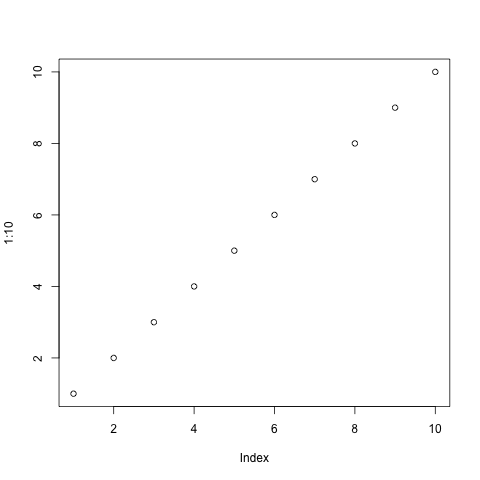

NULL


In [3]:
rprint("plot(1:10)")

The `NULL` here is the return value of the `plot` function. As in R, the graphics are side effects, and not directly representable by values.

### Technical details

The implementation is fairly simple:
 * Before the cell is evaluated, a new graphics device is created (currently either [`png(...)`](https://stat.ethz.ch/R-manual/R-devel/library/grDevices/html/png.html) or [`svg(...)`](https://stat.ethz.ch/R-manual/R-devel/library/grDevices/html/cairo.html)).
 * After the cell has been evaluated, the device is closed (through [`dev.off()`](https://stat.ethz.ch/R-manual/R-devel/library/grDevices/html/dev.html)), and displayed.

The graphics device is controlled by the `RCall.ijulia_setdevice` function:
 * The first argument should be a `MIME` object. Currently supported are:
  * `MIME("image/png")` [default]
  * `MIME("image/svg+xml")`
 * Any extra arguments are passed to the relevant graphics device.
 

In [5]:
RCall.ijulia_setdevice(MIME("image/svg+xml")) # use SVG device

In [7]:
rprint("library(ggplot2)")

[1] "ggplot2"   "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     


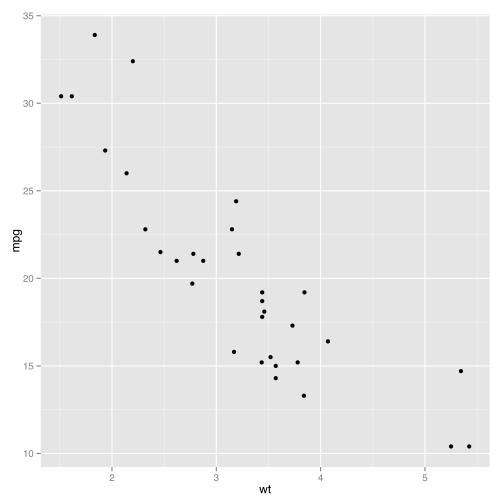

In [8]:
rprint("ggplot(mtcars, aes(wt, mpg)) + geom_point()")

In [13]:
RCall.ijulia_setdevice(MIME("image/png"),width=480,height=400) # use PNG device, options passed as keywords

### Plotting Julia objects

Any Julia objects that can be converted to R objects via `sexp` can be passed via `rcall`:

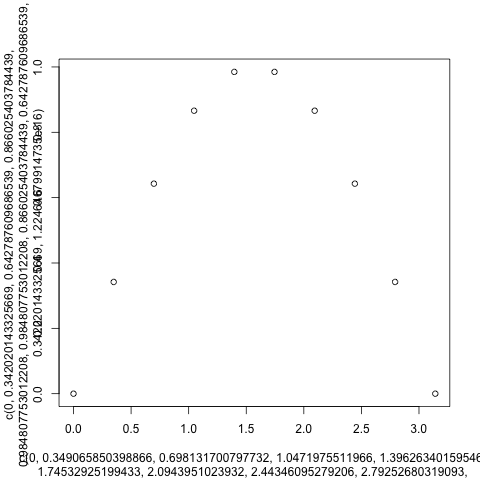

NULL


In [14]:
X = linspace(0,pi,10)
rprint(rcall(:plot,X,sin(X)))

The crazy axis labels are due to R's [non-standard evaluation](http://adv-r.had.co.nz/Computing-on-the-language.html). Unfortunately, Julia is very much standard in its evaluation, so you have to specify your own axis labels:

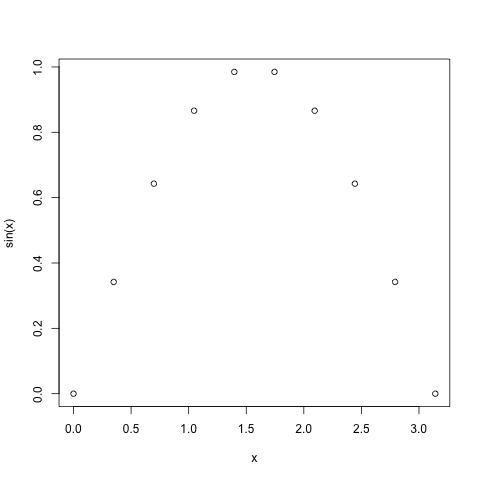

NULL


In [15]:
rprint(rcall(:plot,X,sin(X),xlab="x",ylab="sin(x)"))

## Window display (experimental)

In a non-IJulia interactive session, by R will by default open a new window to display the plot. In order to enable interactive features, such as plot-resizing, you should start the R event loop via
```julia
RCall.rgui_start()
```

This runs frequent calls to R to check if the plot has changed, and redraw if necessary. It can be stopped with
```julia
RCall.rgui_stop()
```